In [91]:
import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np
from pidng.core import RPICAM2DNG
import rawpy

In [2]:
d = RPICAM2DNG()

In [23]:
directory = "lamptest_new_250_copy"
filepaths = glob.glob(f"{directory}/frame-*.jpg")
filepaths

['lamptest_new_250_copy/frame-00000.jpg',
 'lamptest_new_250_copy/frame-00001.jpg',
 'lamptest_new_250_copy/frame-00003.jpg',
 'lamptest_new_250_copy/frame-00002.jpg',
 'lamptest_new_250_copy/frame-00006.jpg',
 'lamptest_new_250_copy/frame-00007.jpg',
 'lamptest_new_250_copy/frame-00005.jpg',
 'lamptest_new_250_copy/frame-00004.jpg',
 'lamptest_new_250_copy/frame-00009.jpg',
 'lamptest_new_250_copy/frame-00008.jpg']

In [24]:
flatfieldpath = filepaths[0]
flatfieldpath

'lamptest_new_250_copy/frame-00000.jpg'

In [26]:
dngpath = d.convert(flatfieldpath)

In [52]:
raw = rawpy.imread(dngpath)
rgb = raw.postprocess(
    output_color=rawpy.ColorSpace.raw,
    gamma=(1, 1),
    user_wb=[1.0, 1.0, 1.0, 1.0],
    no_auto_bright=True,
    output_bps=16
)

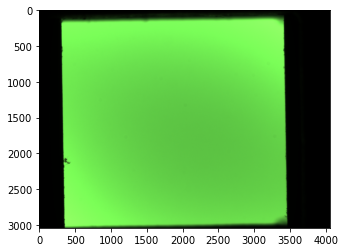

In [53]:
plt.imshow(rgb/(2**16))
plt.show()

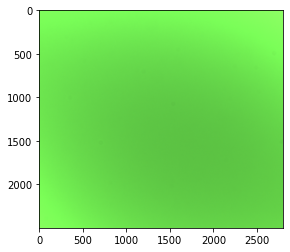

In [54]:
cropped = rgb[250:2750,500:3300]

plt.imshow(cropped/(2**16))
plt.show()

In [55]:
avg_r = np.average(cropped[..., 0])
avg_g = np.average(cropped[..., 1])
avg_b = np.average(cropped[..., 2])
print(avg_r, avg_g, avg_b)

26886.37472742857 56405.244004142856 19519.355422285713


In [56]:
base_wb = [avg_g/avg_r, 1.0, avg_g/avg_b, 1.0]
print(base_wb)

[2.097911844790296, 1.0, 2.889708332260995, 1.0]


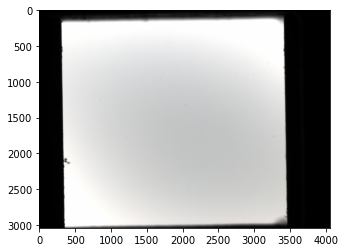

In [57]:
balanced = raw.postprocess(
    output_color=rawpy.ColorSpace.raw,
    gamma=(1, 1),
    user_wb=base_wb,
    no_auto_bright=True,
    output_bps=16
)

plt.imshow(balanced/(2**16))
plt.show()

In [73]:
roi = balanced[250:2750,500:3300]
gain = roi.mean(axis=(0,1)) / balanced.astype("float").clip(1e-6, None)

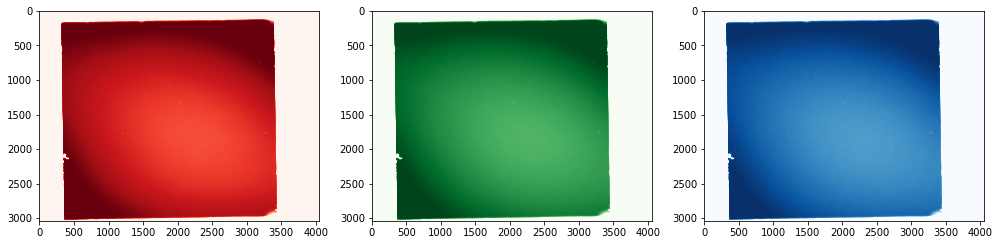

In [77]:
plt.figure(figsize=(14,5))
plt.subplot(131)
plt.imshow(gain[:,:,0], cmap="Reds_r", vmax=1.5)
plt.subplot(132)
plt.imshow(gain[:,:,1], cmap="Greens_r", vmax=1.5)
plt.subplot(133)
plt.imshow(gain[:,:,2], cmap="Blues_r", vmax=1.5)
plt.tight_layout()
plt.show()

In [79]:
directory = "lamptest_new_copy_copy"
filepaths = glob.glob(f"{directory}/frame-*.jpg")
filepaths

['lamptest_new_copy_copy/frame-00000.jpg',
 'lamptest_new_copy_copy/frame-00001.jpg',
 'lamptest_new_copy_copy/frame-00003.jpg',
 'lamptest_new_copy_copy/frame-00002.jpg',
 'lamptest_new_copy_copy/frame-00006.jpg',
 'lamptest_new_copy_copy/frame-00007.jpg',
 'lamptest_new_copy_copy/frame-00005.jpg',
 'lamptest_new_copy_copy/frame-00004.jpg',
 'lamptest_new_copy_copy/frame-00009.jpg',
 'lamptest_new_copy_copy/frame-00008.jpg']

In [82]:
examplepath = filepaths[3]
examplepath

'lamptest_new_copy_copy/frame-00002.jpg'

In [83]:
dngpath = d.convert(examplepath)

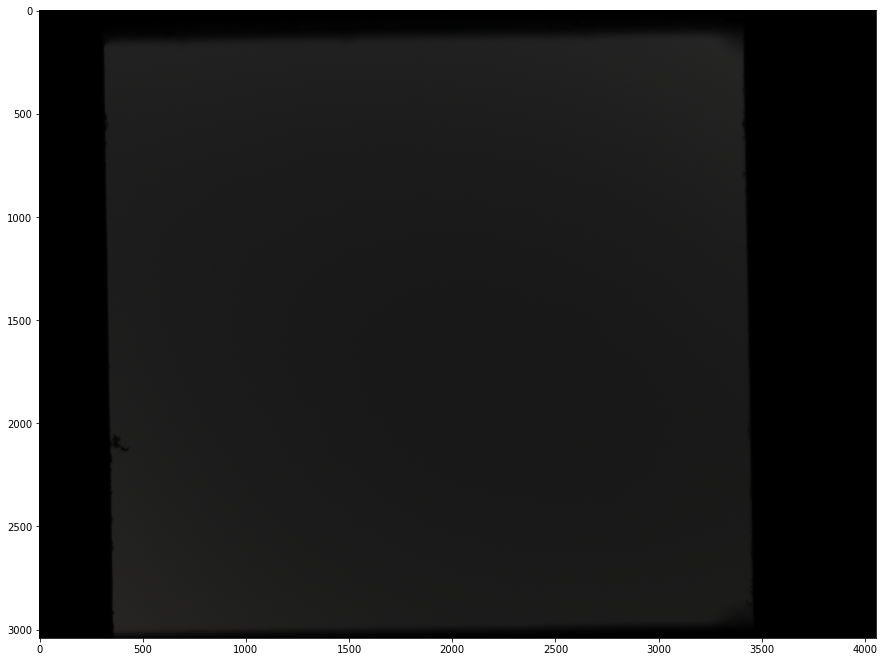

In [90]:
raw = rawpy.imread(dngpath)
rgb = raw.postprocess(
    output_color=rawpy.ColorSpace.raw,
    gamma=(1, 1),
    user_wb=base_wb,
    no_auto_bright=True,
    output_bps=16
)

plt.figure(figsize=(15,12))
plt.imshow(rgb/(2**16))
plt.show()

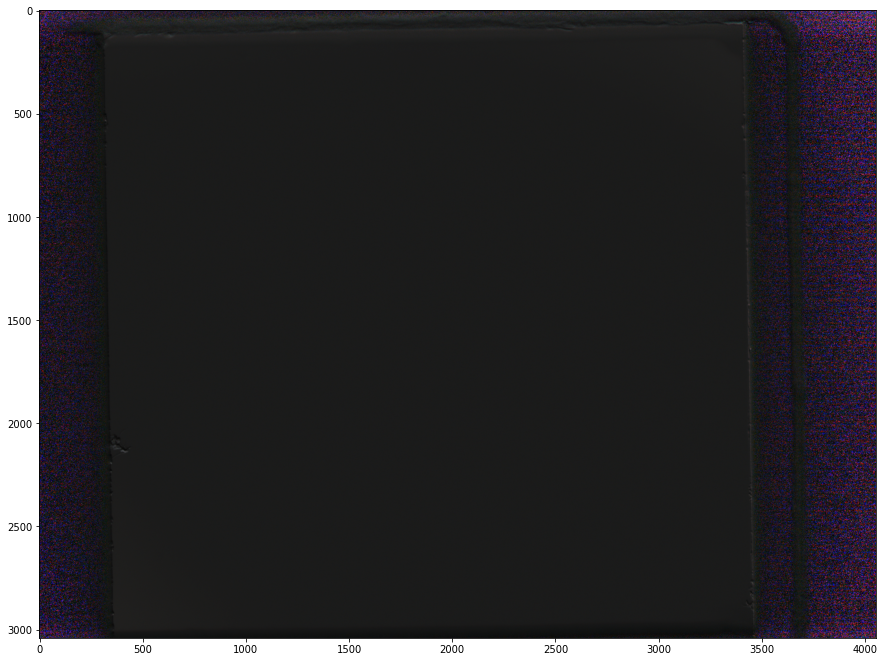

In [88]:
corrected = (rgb * gain).clip(0, 2**16-1).astype("uint16")

plt.figure(figsize=(15,12))
plt.imshow(corrected/(2**16))
plt.show()

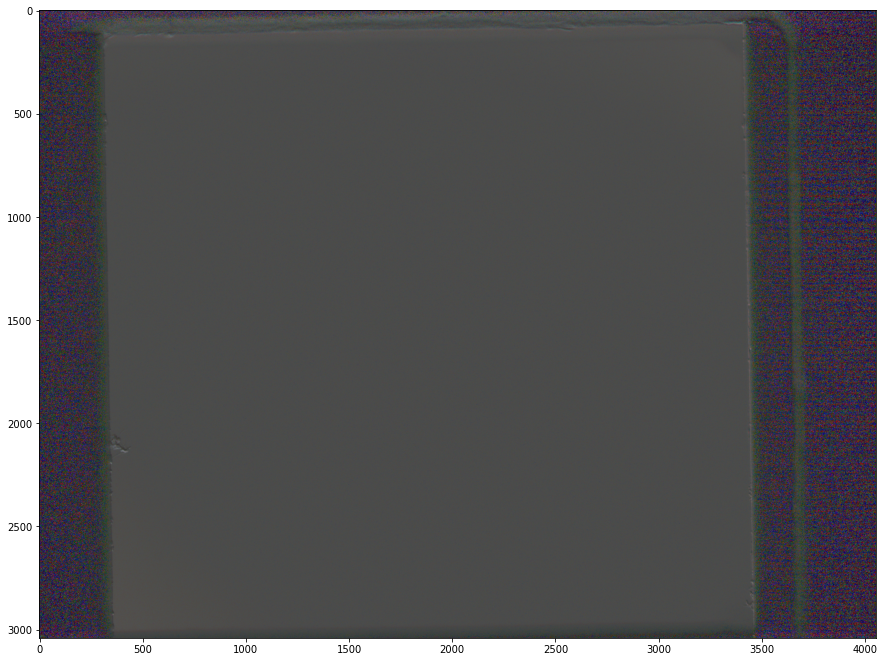

In [96]:
squashed = (corrected / 2**16 * 255).astype("uint8")
hsv = cv2.cvtColor(squashed, cv2.COLOR_RGB2HSV)
hsv[:,:,2] += 50
bright = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.figure(figsize=(15,12))
plt.imshow(bright)
plt.show()

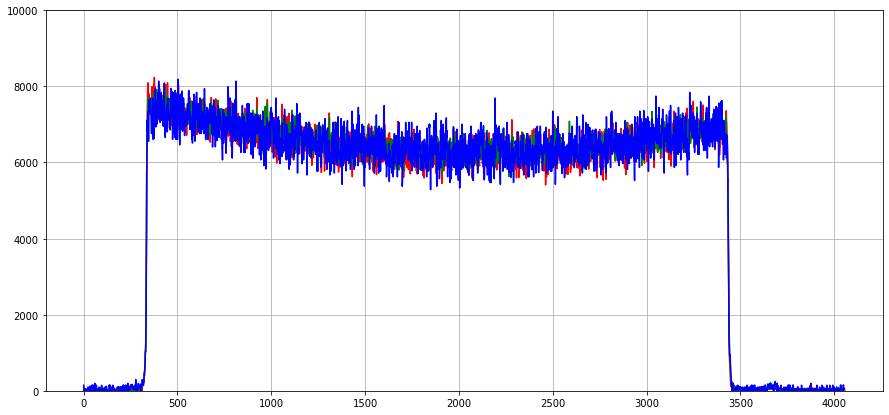

In [103]:
plt.figure(figsize=(15,7))
plt.plot(rgb[1500,:,0], c="r")
plt.plot(rgb[1500,:,1], c="g")
plt.plot(rgb[1500,:,2], c="b")
plt.ylim([0, 10000])
plt.grid()
plt.show()

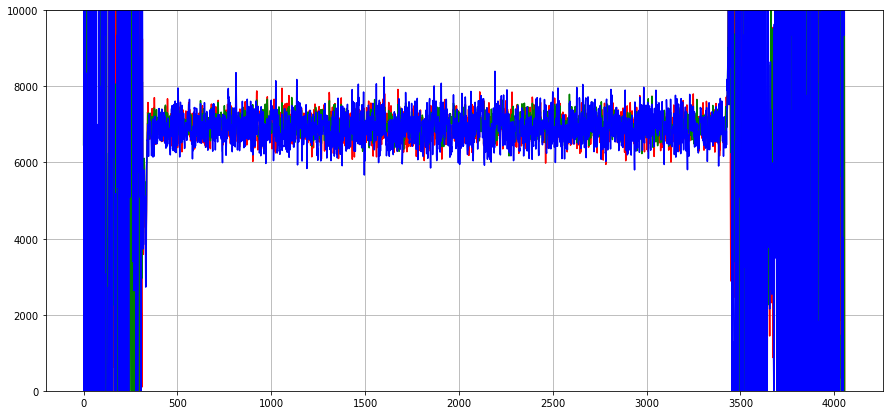

In [104]:
plt.figure(figsize=(15,7))
plt.plot(corrected[1500,:,0], c="r")
plt.plot(corrected[1500,:,1], c="g")
plt.plot(corrected[1500,:,2], c="b")
plt.ylim([0, 10000])
plt.grid()
plt.show()